In [1]:
import pymysql.cursors
import os
from dotenv  import load_dotenv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import used_car

In [2]:
load_dotenv()

host = os.getenv('HOST')
user = os.getenv('USER')
password = os.getenv('PASSWORD')
database = os.getenv('DATABASE')

In [3]:
connection = pymysql.connect(user=user,
host = host,
password =password,
database =database)

In [4]:
cursor = connection.cursor()

In [5]:
query = '''select Type as car ,count(type) as Total from extension
group by type;'''


In [6]:

l = ['SUV','Van','Coupe','Sedan','Convertible','Pickup','Minivan','Hatchback','Wagon']

In [7]:
df = used_car.select_query(query)

In [8]:
df

,car,Total
0,SUV,9972
1,Van,286
2,Coupe,4163
3,Sedan,8124
4,Convertible,1310
5,Pickup,2959
6,Minivan,547
7,Hatchback,759
8,Wagon,6


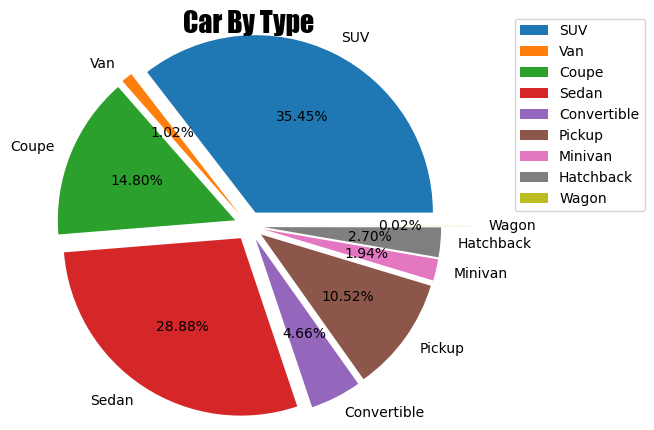

In [9]:
plt.pie(df['Total'],labels = l,autopct='%1.2f%%',explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.3),radius = 1.2)
plt.title('Car By Type',fontsize = 20,fontname='impact')
plt.legend(loc="center left",
          bbox_to_anchor=(1.2, 0.3, 1, 1))
plt.show()

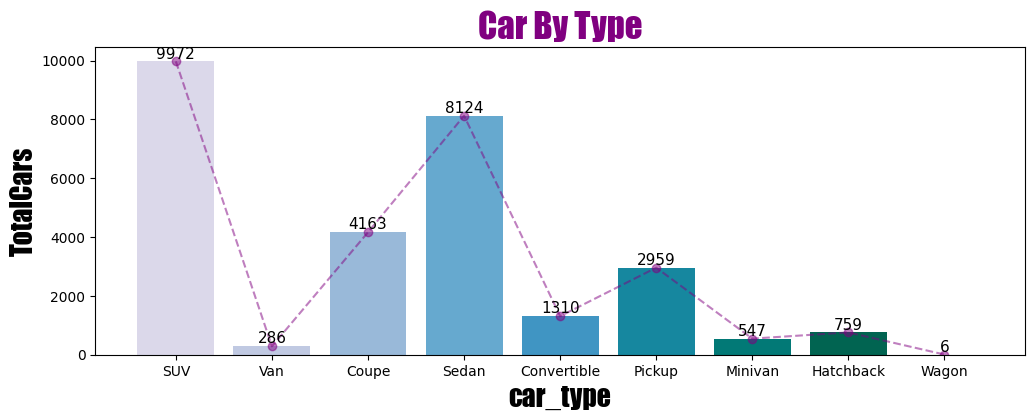

In [10]:
seq= np.linspace(0.2,1,9)
cm = plt.cm.PuBuGn(seq)
plt.figure(figsize=(12,4))
plt.bar(df['car'],df['Total'],color=cm)
plt.plot(df['Total'],marker = 'o',color='purple',alpha = 0.5,ls='dashed')

for i in range(len(df['car'])):
    plt.annotate(text = df['Total'][i],xy =( i,df['Total'][i]),horizontalalignment='center',verticalalignment='bottom',
                size=11)

plt.title('Car By Type',fontsize = 25,color = 'purple',fontname = 'impact')

plt.xlabel('car_type',size = 20,fontname = 'impact')
plt.ylabel('TotalCars',size=20,fontname = 'impact')
plt.show()

In [118]:
query = '''select type as car_type,avg(miles_per_gallon)  as Avg_mile_per_gallon from extension 
group by type;'''

In [119]:
df= used_car.select_query(query)

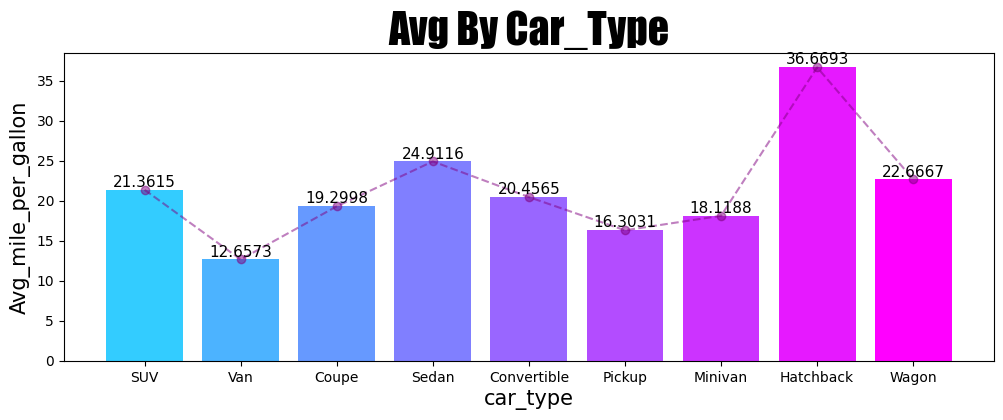

In [120]:
seq= np.linspace(0.2,1,9)
cm = plt.cm.cool(seq)
plt.figure(figsize=(12,4))
plt.bar(df['car_type'],df['Avg_mile_per_gallon'],color=cm)
plt.plot(df['Avg_mile_per_gallon'],marker = 'o',color='purple',alpha = 0.5,ls='dashed')
plt.title('Avg By Car_Type',fontsize=30,fontname='impact')

for i in range(len(df['car_type'])):
    plt.annotate(text = df['Avg_mile_per_gallon'][i],xy =( i,df['Avg_mile_per_gallon'][i]),horizontalalignment='center',verticalalignment='bottom',
                size=11)

plt.xlabel('car_type',size = 15)
plt.ylabel('Avg_mile_per_gallon',size=15)
plt.show()

In [11]:
query = '''select premium_version,count(premium_version) as Total_count from extension
group by premium_version;'''

In [12]:
df= used_car.select_query(query)

In [13]:
arr = np.array(df['premium_version'])

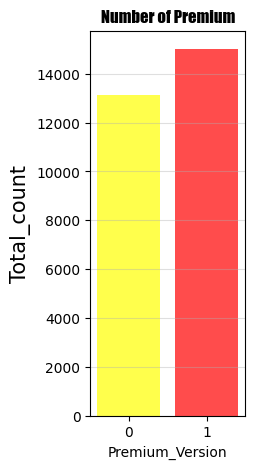

In [14]:
plt.figure(figsize=(2,5))
plt.bar(arr,df['Total_count'],color=['red','yellow'],alpha=0.7)
plt.grid(axis = 'y',alpha=0.4)
plt.title('Number of Premium',fontname='impact')
plt.xlabel('Premium_Version')
plt.ylabel('Total_count',size = 15)
plt.show()

In [15]:
query = '''select model,round(avg(msrp),2) as Avg_MSRP from extension 
where model_year>2010
group by model
order by Avg_MSRP desc
limit 15
;'''

In [16]:
df= used_car.select_query(query)

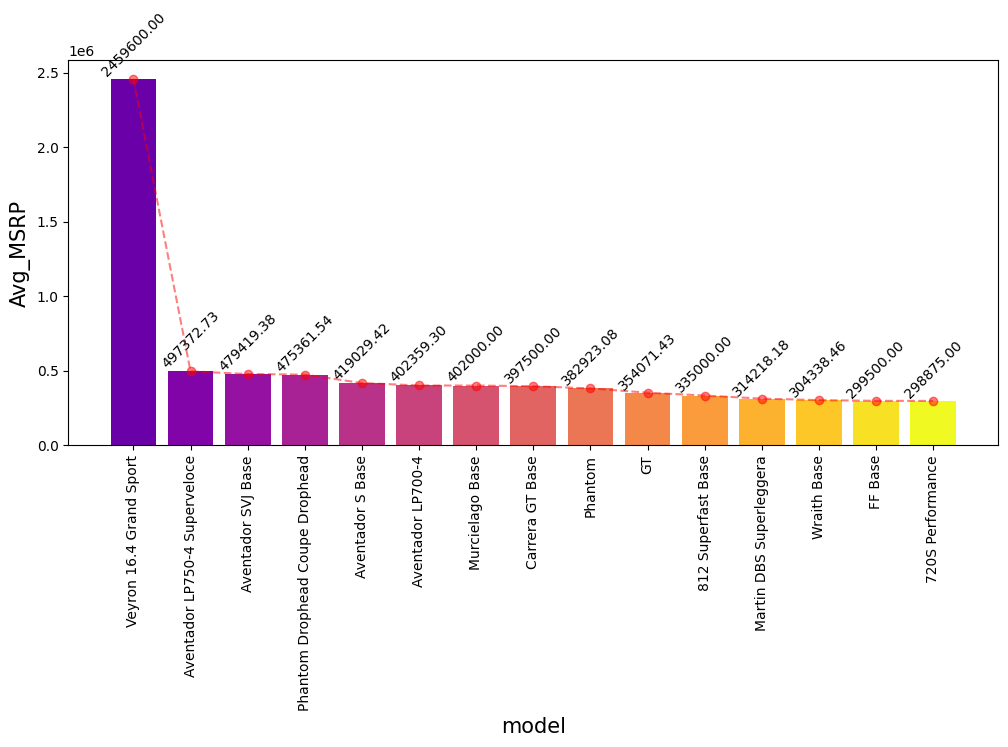

In [17]:
seq= np.linspace(0.2,1,15)
cm = plt.cm.plasma(seq)
plt.figure(figsize=(12,5))
plt.bar(df['model'],df['Avg_MSRP'],color = cm)
plt.plot(df['Avg_MSRP'],marker = 'o',color='red',alpha = 0.5,ls='dashed')

for i in range(len(df['model'])):
    plt.annotate(text = df['Avg_MSRP'][i],xy =( i,df['Avg_MSRP'][i]),horizontalalignment='center',verticalalignment='bottom',
                size=10,rotation=45)

plt.xlabel('model',size = 15)
plt.ylabel('Avg_MSRP',size=15)
plt.xticks(rotation=90)
plt.show()

In [18]:
query = '''select collection_car,avg(miles_per_gallon) as Avg_mpg from extension
group by collection_car;'''

In [19]:
df= used_car.select_query(query)

In [20]:
df

,collection_car,Avg_mpg
0,0,22.2671
1,1,18.6431


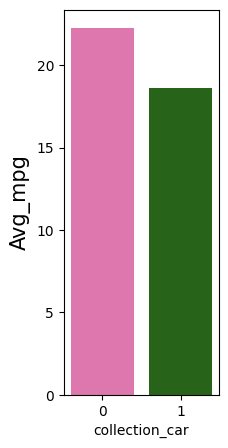

In [21]:
seq= np.linspace(0.2,1,2)
cm = plt.cm.PiYG(seq)
plt.figure(figsize=(2,5))
plt.bar(df['collection_car'],df['Avg_mpg'],color=cm)

plt.xlabel('collection_car')
plt.ylabel('Avg_mpg',size = 15)

plt.show()

In [22]:
query = '''select brand,count(model) as total_cars from extension
group by brand
order by count(model) desc
limit 10;'''

In [23]:
df= used_car.select_query(query)

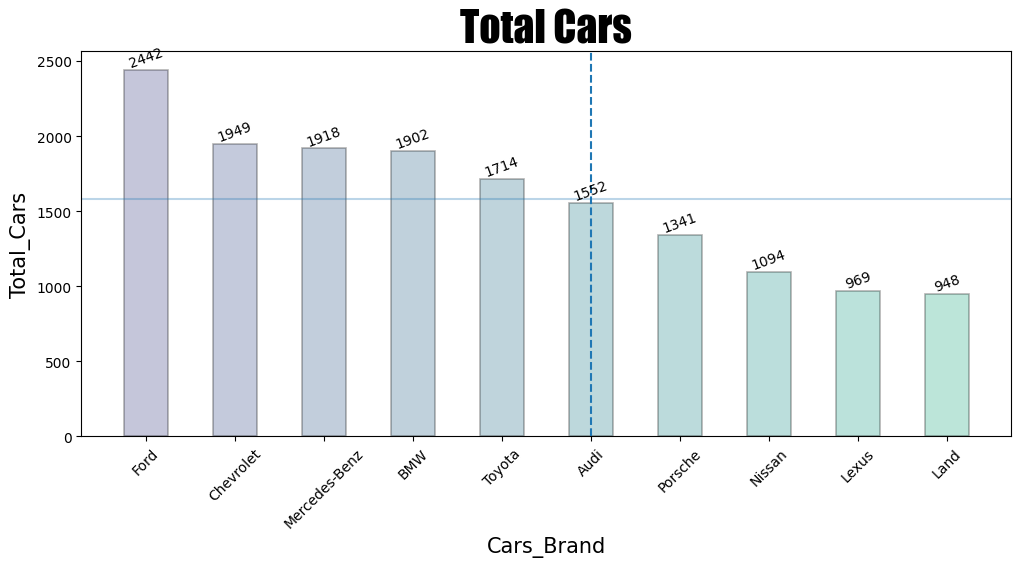

In [24]:
seq= np.linspace(0.2,0.7,12)
cm = plt.cm.viridis(seq)
plt.figure(figsize = (12,5))
plt.bar(df['brand'],df['total_cars'], width=0.5,color=cm,alpha=0.3,
        edgecolor='black',lw=1.2)
plt.axhline(y=np.mean(df['total_cars']),alpha = 0.3)
plt.axvline(x=5,ls='dashed')
for i in range(len(df['brand'])):
    plt.annotate(text = df['total_cars'][i],xy =( i,df['total_cars'][i]),horizontalalignment='center',verticalalignment='bottom',
                size=10,rotation=20)

plt.title('Total Cars',fontsize=30,fontname='impact')
plt.xticks(rotation=45)
plt.xlabel('Cars_Brand',size = 15)
plt.ylabel('Total_Cars',size = 15)

plt.show()

In [25]:
query = '''select type,brand,model,miles_per_gallon from extension

order by miles_per_gallon desc
limit 5;'''

In [26]:
df= used_car.select_query(query)

In [27]:
df

,type,brand,model,miles_per_gallon
0,SUV,Audi,Model Y Long Range,234
1,SUV,Tesla,Model X Long Range,234
2,Sedan,Tesla,Model 3,142
3,Sedan,Tesla,Model 3 Mid Range,142
4,Sedan,Tesla,Model 3 Standard Range,141


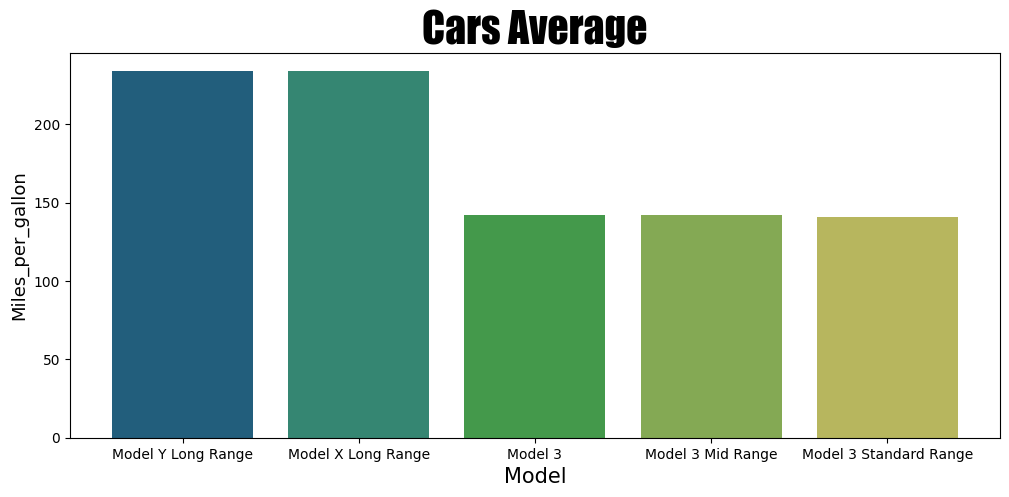

In [28]:
seq= np.linspace(0.2,0.7,5)
cm = plt.cm.gist_earth(seq)
plt.figure(figsize=(12,5))
plt.bar(df['model'],df['miles_per_gallon'],color=cm)
plt.title('Cars Average',fontsize=30,fontname = 'impact')
plt.xlabel('Model',fontsize = 15)
plt.ylabel('Miles_per_gallon',fontsize = 13)
plt.show()

In [29]:
query = '''SELECT model_year, COUNT(*) AS car_count
FROM extension
GROUP BY model_year
order by  model_year desc;'''

In [30]:
df= used_car.select_query(query)

In [31]:
df

,model_year,car_count
0,2024,154
1,2023,1220
2,2022,1601
3,2021,1644
4,2020,1582
5,2019,1653
6,2018,1661
7,2017,1612
8,2016,1661
9,2015,1510


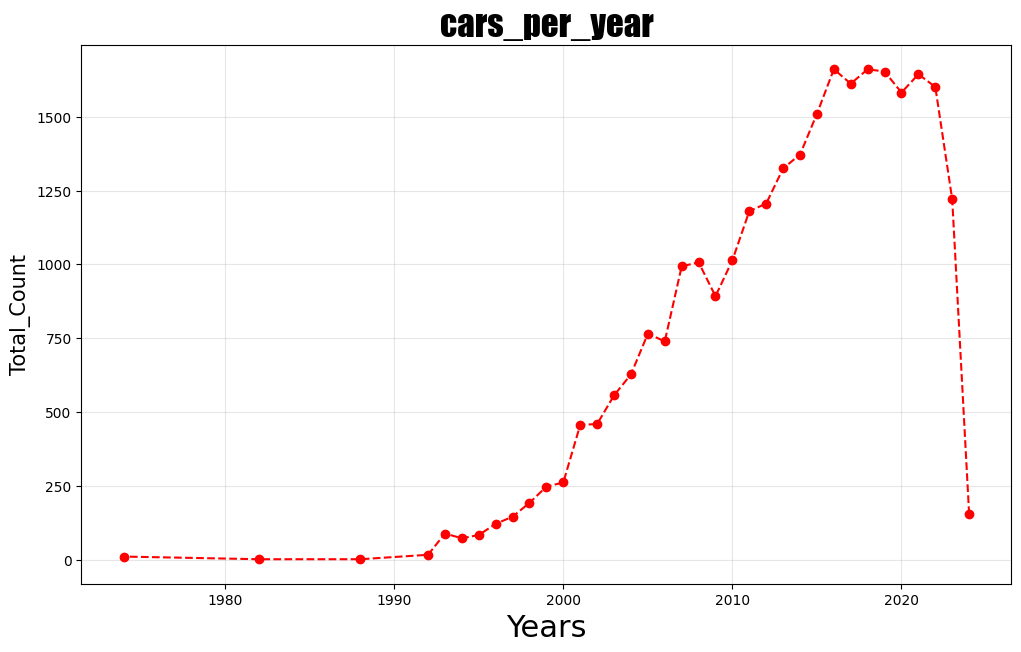

In [38]:
plt.figure(figsize=(12,7))
plt.plot(df['model_year'],df['car_count'],ls='dashed',color='red',marker='o')
plt.grid(alpha=0.3)
plt.title('cars_per_year',fontsize=25,fontname= 'impact')
plt.xlabel('Years',size=22)
plt.ylabel('Total_Count',fontsize=15)
plt.show()